In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

r = pd.read_json('resolver_geolocation_data.json')
ip_europe = r[(r['country_name']=='France') | (r['country_name']=='Austria') | (r['country_name']=='Russia') | (r['country_name']=='Netherlands') | (r['country_name']=='Spain') | (r['country_name']=='Luxembourg') | (r['country_name']=='Czechia')  | (r['country_name']=='Switzerland')  | (r['country_name']=='United Kingdom')  | (r['country_name']=='Finland')  | (r['country_name']=='Germany')  | (r['country_name']=='Sweden')  | (r['country_name']=='Denmark')]
ip_asia = r[(r['country_name']=='Cyprus') | (r['country_name']=='India') | (r['country_name']=='China') | (r['country_name']=='Japan') | (r['country_name']=='Singapore')  | (r['country_name']=='Indonesia') | (r['country_name']=='Hong Kong')| (r['country_name']=='Taiwan')]
ip_north_america = r[(r['country_name']=='United States') | (r['country_name']=='Canada') ]
ip_australia = r[(r['country_name']=='Australia')]
ip_not_found = r[(r['IP_address'] == 'None')]
r.head()

df = pd.read_json('data_300.json')
df["difference"] = df["rtime"] - df["ping_time"]


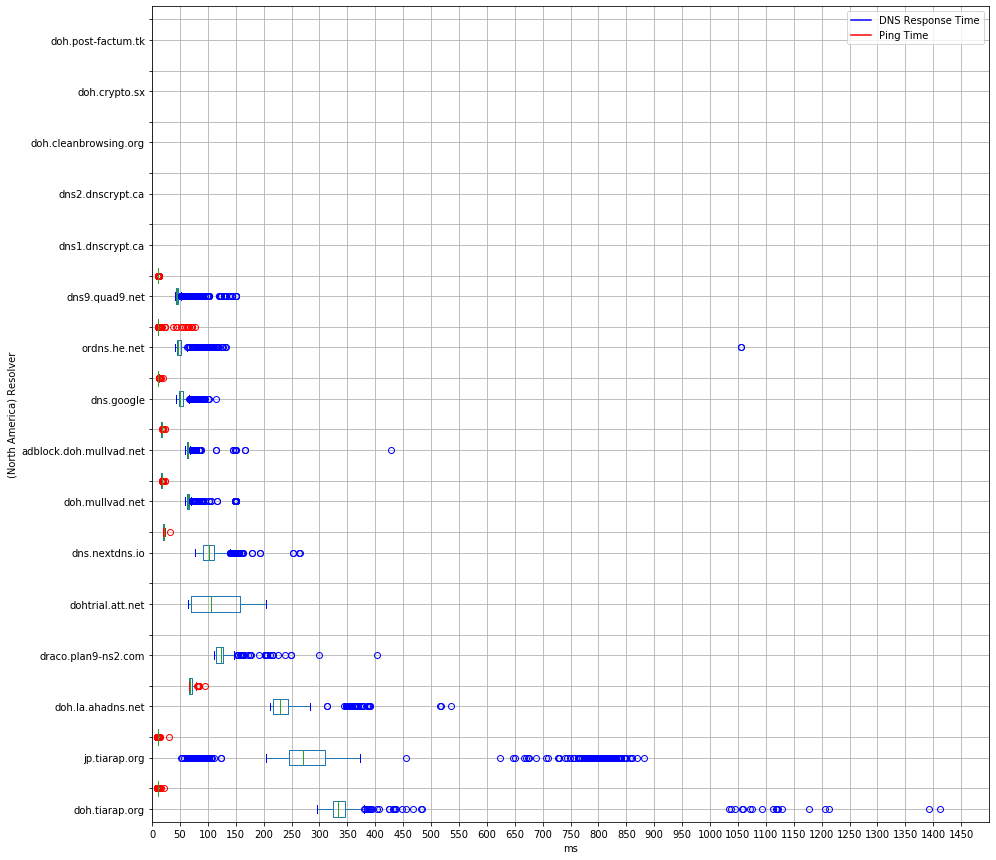

In [2]:
## This boxplot sorts by ascending order of DNS response time



# North America Boxplot for Response Time, Domain: Google and Netflix
NA_array_of_resolvers = pd.Series(ip_north_america['resolver']).unique()

NA_dict_resp_time_series={}
NA_length=len(NA_array_of_resolvers)

NA_both_resp=[0]*NA_length
NA_resp_time_series=[0]*NA_length

for i in range(NA_length):
    NA_both_resp[i]=df[(df['resolver']==NA_array_of_resolvers[i])]
    NA_resp_time_series[i]=(NA_both_resp[i]['rtime'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_resp_time_series[NA_new_list[i]]= NA_resp_time_series[i]
NA_frame_to_plot=pd.DataFrame(NA_dict_resp_time_series)


# North America Boxplot for Ping Time

NA_dict_ping_series={}


NA_both_ping=[0]*NA_length
NA_ping_series = [0]*NA_length
for i in range(NA_length):
    NA_both_ping[i]=df[(df['resolver']==NA_array_of_resolvers[i])]
    NA_ping_series[i]=(NA_both_ping[i]['ping_time'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_ping_series[NA_new_list[i]]= NA_ping_series[i]
NA_ping_frame_to_plot=pd.DataFrame(NA_dict_ping_series)
NA_ping = NA_ping_frame_to_plot


#Make two plots and merge
c = "blue"
z = "red"



medians = NA_frame_to_plot.median()
medians.sort_values(ascending=False, inplace=True)
ping_times = NA_ping[medians.index]
response_times = NA_frame_to_plot[medians.index]


NA_boxplot = response_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(NA_dict_resp_time_series)))*2.0-0.4, widths=0.6)
NA_ping_boxplot = ping_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(NA_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(North America) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.show()

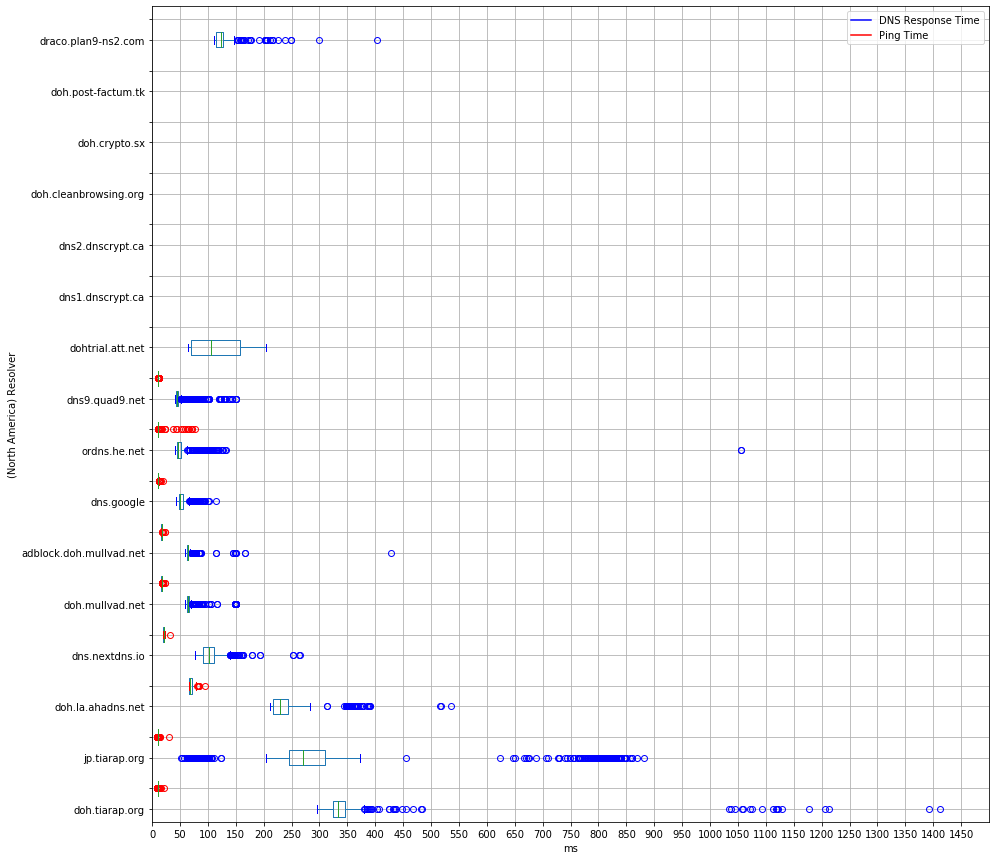

In [3]:
## This boxplot sorts by difference between response time and ping time in ascending order



# North America Boxplot for Response Time, Domain: Google and Netflix
NA_array_of_resolvers = pd.Series(ip_north_america['resolver']).unique()

NA_dict_resp_time_series={}
NA_length=len(NA_array_of_resolvers)

NA_both_resp=[0]*NA_length
NA_resp_time_series=[0]*NA_length

for i in range(NA_length):
    NA_both_resp[i]=df[(df['resolver']==NA_array_of_resolvers[i])]
    NA_resp_time_series[i]=(NA_both_resp[i]['rtime'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_resp_time_series[NA_new_list[i]]= NA_resp_time_series[i]
NA_frame_to_plot=pd.DataFrame(NA_dict_resp_time_series)


# North America Boxplot for Ping Time

NA_dict_ping_series={}


NA_both_ping=[0]*NA_length
NA_ping_series = [0]*NA_length
for i in range(NA_length):
    NA_both_ping[i]=df[(df['resolver']==NA_array_of_resolvers[i])]
    NA_ping_series[i]=(NA_both_ping[i]['ping_time'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_ping_series[NA_new_list[i]]= NA_ping_series[i]
NA_ping_frame_to_plot=pd.DataFrame(NA_dict_ping_series)
NA_ping = NA_ping_frame_to_plot

# differences between response time and ping time

NA_dict_diff_series={}

NA_both_diff=[0]*NA_length
NA_diff_series = [0]*NA_length
for i in range(NA_length):
    NA_both_diff[i]=df[(df['resolver']==NA_array_of_resolvers[i])]
    NA_diff_series[i]=(NA_both_diff[i]['difference'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_diff_series[NA_new_list[i]]= NA_diff_series[i]
NA_diff_frame_to_plot=pd.DataFrame(NA_dict_diff_series)
NA_diff = NA_diff_frame_to_plot


#Make two plots and merge
c = "blue"
z = "red"



medians = NA_diff.median()
medians.sort_values(ascending=False, inplace=True)
ping_times = NA_ping[medians.index]
response_times = NA_frame_to_plot[medians.index]


NA_boxplot = response_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(NA_dict_resp_time_series)))*2.0-0.4, widths=0.6)
NA_ping_boxplot = ping_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(NA_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(North America) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.show()

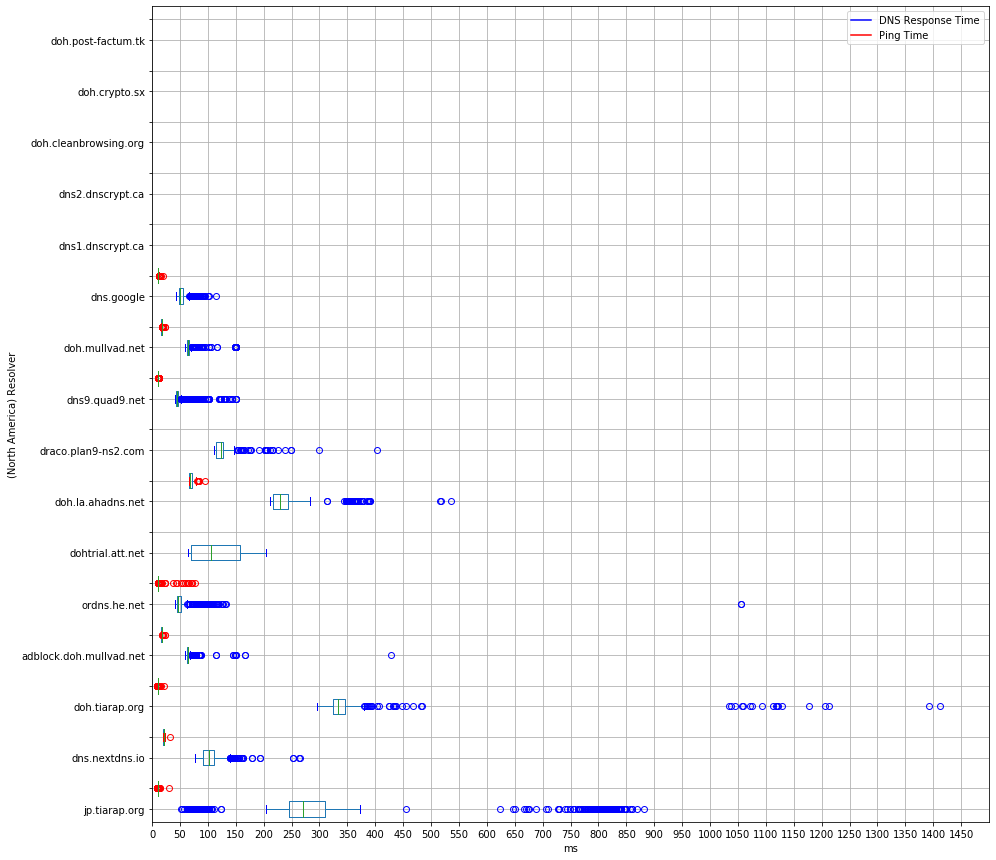

In [4]:
## This boxplot sorts by standard deviation of response time in ascending order



# North America Boxplot for Response Time, Domain: Google and Netflix
NA_array_of_resolvers = pd.Series(ip_north_america['resolver']).unique()

NA_dict_resp_time_series={}
NA_length=len(NA_array_of_resolvers)

NA_both_resp=[0]*NA_length
NA_resp_time_series=[0]*NA_length

for i in range(NA_length):
    NA_both_resp[i]=df[(df['resolver']==NA_array_of_resolvers[i])]
    NA_resp_time_series[i]=(NA_both_resp[i]['rtime'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_resp_time_series[NA_new_list[i]]= NA_resp_time_series[i]
NA_frame_to_plot=pd.DataFrame(NA_dict_resp_time_series)


# North America Boxplot for Ping Time

NA_dict_ping_series={}


NA_both_ping=[0]*NA_length
NA_ping_series = [0]*NA_length
for i in range(NA_length):
    NA_both_ping[i]=df[(df['resolver']==NA_array_of_resolvers[i])]
    NA_ping_series[i]=(NA_both_ping[i]['ping_time'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_ping_series[NA_new_list[i]]= NA_ping_series[i]
NA_ping_frame_to_plot=pd.DataFrame(NA_dict_ping_series)
NA_ping = NA_ping_frame_to_plot

#Make two plots and merge
c = "blue"
z = "red"


deviation = NA_frame_to_plot.std()
deviation.sort_values(ascending=False, inplace=True)
ping_times = NA_ping[deviation.index]
response_times = NA_frame_to_plot[deviation.index]


NA_boxplot = response_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(NA_dict_resp_time_series)))*2.0-0.4, widths=0.6)
NA_ping_boxplot = ping_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(NA_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(North America) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.show()

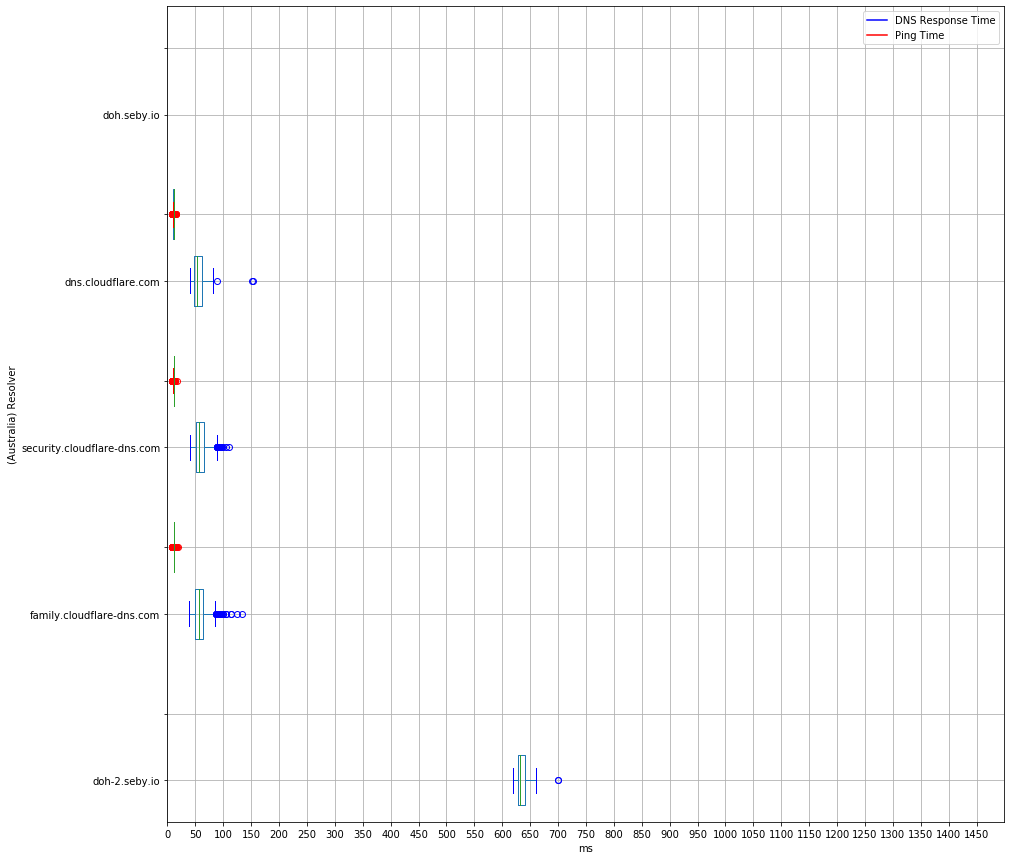

In [5]:
## This boxplot sorts by ascending order of DNS response time



# Australia Boxplot for Response Time, Domain: Google and Netflix
aus_array_of_resolvers = pd.Series(ip_australia['resolver']).unique()

aus_dict_resp_time_series={}
aus_length=len(aus_array_of_resolvers)

aus_both_resp=[0]*aus_length
aus_resp_time_series=[0]*aus_length

for i in range(aus_length):
    aus_both_resp[i]=df[(df['resolver']==aus_array_of_resolvers[i])]
    aus_resp_time_series[i]=(aus_both_resp[i]['rtime'])
    y_axis = aus_array_of_resolvers
    aus_temp = [s.replace("https://", "") for s in y_axis]
    aus_new_list = [s.replace("/dns-query", "") for s in aus_temp]
    aus_dict_resp_time_series[aus_new_list[i]]= aus_resp_time_series[i]
aus_frame_to_plot=pd.DataFrame(aus_dict_resp_time_series)


# Australia Boxplot for Ping Time

aus_dict_ping_series={}


aus_both_ping=[0]*aus_length
aus_ping_series = [0]*aus_length
for i in range(aus_length):
    aus_both_ping[i]=df[(df['resolver']==aus_array_of_resolvers[i])]
    aus_ping_series[i]=(aus_both_ping[i]['ping_time'])
    y_axis = aus_array_of_resolvers
    aus_temp = [s.replace("https://", "") for s in y_axis]
    aus_new_list = [s.replace("/dns-query", "") for s in aus_temp]
    aus_dict_ping_series[aus_new_list[i]]= aus_ping_series[i]
aus_ping_frame_to_plot=pd.DataFrame(aus_dict_ping_series)
aus_ping = aus_ping_frame_to_plot


#Make two plots and merge
c = "blue"
z = "red"



medians = aus_frame_to_plot.median()
medians.sort_values(ascending=False, inplace=True)
ping_times = aus_ping[medians.index]
response_times = aus_frame_to_plot[medians.index]


aus_boxplot = response_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(aus_dict_resp_time_series)))*2.0-0.4, widths=0.6)
aus_ping_boxplot = ping_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(aus_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Australia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.show()

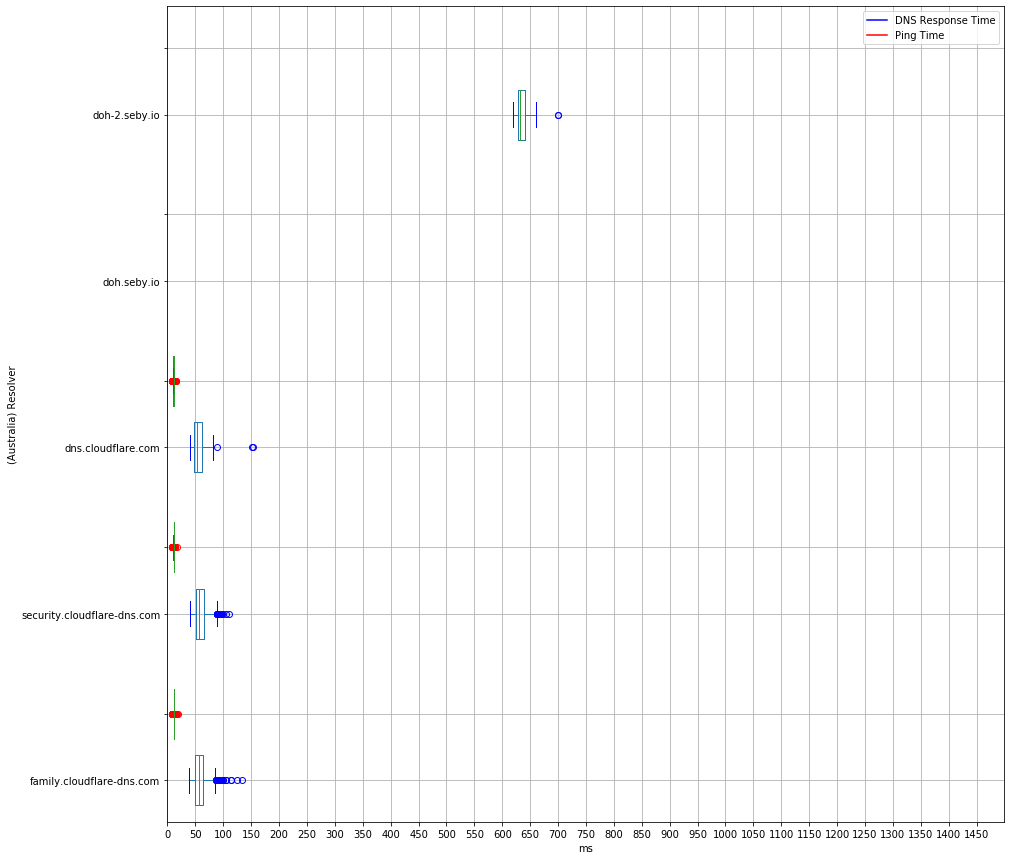

In [6]:
## This boxplot sorts by difference between response time and ping time in ascending order



# Australia Boxplot for Response Time, Domain: Google and Netflix
aus_array_of_resolvers = pd.Series(ip_australia['resolver']).unique()

aus_dict_resp_time_series={}
aus_length=len(aus_array_of_resolvers)

aus_both_resp=[0]*aus_length
aus_resp_time_series=[0]*aus_length

for i in range(aus_length):
    aus_both_resp[i]=df[(df['resolver']==aus_array_of_resolvers[i])]
    aus_resp_time_series[i]=(aus_both_resp[i]['rtime'])
    y_axis = aus_array_of_resolvers
    aus_temp = [s.replace("https://", "") for s in y_axis]
    aus_new_list = [s.replace("/dns-query", "") for s in aus_temp]
    aus_dict_resp_time_series[aus_new_list[i]]= aus_resp_time_series[i]
aus_frame_to_plot=pd.DataFrame(aus_dict_resp_time_series)


# Australia Boxplot for Ping Time

aus_dict_ping_series={}


aus_both_ping=[0]*aus_length
aus_ping_series = [0]*aus_length
for i in range(aus_length):
    aus_both_ping[i]=df[(df['resolver']==aus_array_of_resolvers[i])]
    aus_ping_series[i]=(aus_both_ping[i]['ping_time'])
    y_axis = aus_array_of_resolvers
    aus_temp = [s.replace("https://", "") for s in y_axis]
    aus_new_list = [s.replace("/dns-query", "") for s in aus_temp]
    aus_dict_ping_series[aus_new_list[i]]= aus_ping_series[i]
aus_ping_frame_to_plot=pd.DataFrame(aus_dict_ping_series)
aus_ping = aus_ping_frame_to_plot

# differences between response time and ping time

aus_dict_diff_series={}

aus_both_diff=[0]*aus_length
aus_diff_series = [0]*aus_length
for i in range(aus_length):
    aus_both_diff[i]=df[(df['resolver']==aus_array_of_resolvers[i])]
    aus_diff_series[i]=(aus_both_diff[i]['difference'])
    y_axis = aus_array_of_resolvers
    aus_temp = [s.replace("https://", "") for s in y_axis]
    aus_new_list = [s.replace("/dns-query", "") for s in aus_temp]
    aus_dict_diff_series[aus_new_list[i]]= aus_diff_series[i]
aus_diff_frame_to_plot=pd.DataFrame(aus_dict_diff_series)
aus_diff = aus_diff_frame_to_plot

#Make two plots and merge
c = "blue"
z = "red"



medians = aus_diff.median()
medians.sort_values(ascending=False, inplace=True)
ping_times = aus_ping[medians.index]
response_times = aus_frame_to_plot[medians.index]


aus_boxplot = response_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(aus_dict_resp_time_series)))*2.0-0.4, widths=0.6)
aus_ping_boxplot = ping_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(aus_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Australia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.show()

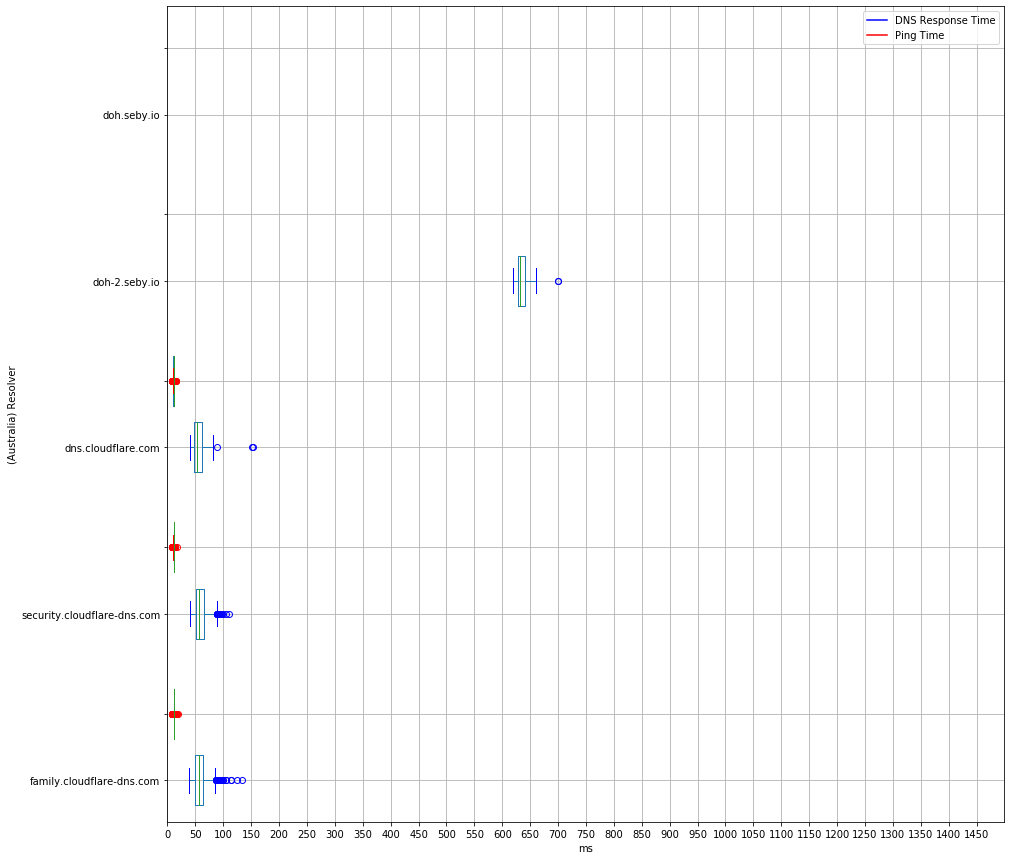

In [7]:
## This boxplot sorts by standard deviation of response time in ascending order



# Australia Boxplot for Response Time, Domain: Google and Netflix
aus_array_of_resolvers = pd.Series(ip_australia['resolver']).unique()

aus_dict_resp_time_series={}
aus_length=len(aus_array_of_resolvers)

aus_both_resp=[0]*aus_length
aus_resp_time_series=[0]*aus_length

for i in range(aus_length):
    aus_both_resp[i]=df[(df['resolver']==aus_array_of_resolvers[i])]
    aus_resp_time_series[i]=(aus_both_resp[i]['rtime'])
    y_axis = aus_array_of_resolvers
    aus_temp = [s.replace("https://", "") for s in y_axis]
    aus_new_list = [s.replace("/dns-query", "") for s in aus_temp]
    aus_dict_resp_time_series[aus_new_list[i]]= aus_resp_time_series[i]
aus_frame_to_plot=pd.DataFrame(aus_dict_resp_time_series)


# Australia Boxplot for Ping Time

aus_dict_ping_series={}


aus_both_ping=[0]*aus_length
aus_ping_series = [0]*aus_length
for i in range(aus_length):
    aus_both_ping[i]=df[(df['resolver']==aus_array_of_resolvers[i])]
    aus_ping_series[i]=(aus_both_ping[i]['ping_time'])
    y_axis = aus_array_of_resolvers
    aus_temp = [s.replace("https://", "") for s in y_axis]
    aus_new_list = [s.replace("/dns-query", "") for s in aus_temp]
    aus_dict_ping_series[aus_new_list[i]]= aus_ping_series[i]
aus_ping_frame_to_plot=pd.DataFrame(aus_dict_ping_series)
aus_ping = aus_ping_frame_to_plot


#Make two plots and merge
c = "blue"
z = "red"



deviation = aus_frame_to_plot.std()
deviation.sort_values(ascending=False, inplace=True)
ping_times = aus_ping[deviation.index]
response_times = aus_frame_to_plot[deviation.index]


aus_boxplot = response_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(aus_dict_resp_time_series)))*2.0-0.4, widths=0.6)
aus_ping_boxplot = ping_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(aus_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Australia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.show()

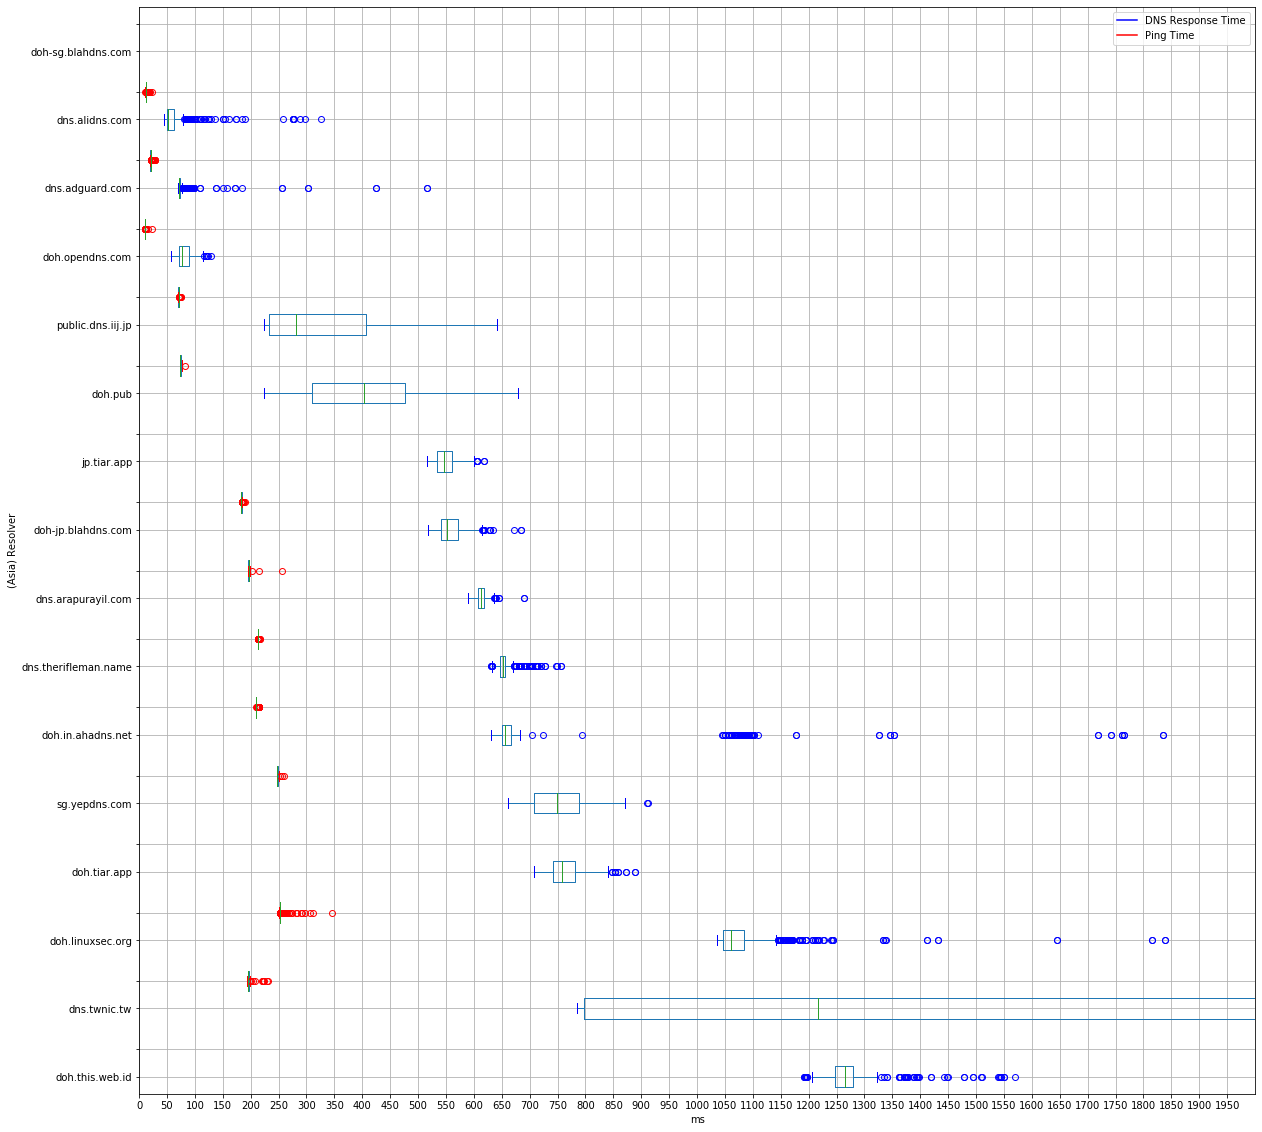

In [19]:
## This boxplot sorts by ascending order of DNS response time



# Asia Boxplot for Response Time, Domain: Google and Netflix
asia_array_of_resolvers = pd.Series(ip_asia['resolver']).unique()

asia_dict_resp_time_series={}
asia_length=len(asia_array_of_resolvers)

asia_both_resp=[0]*asia_length
asia_resp_time_series=[0]*asia_length

for i in range(asia_length):
    asia_both_resp[i]=df[(df['resolver']==asia_array_of_resolvers[i])]
    asia_resp_time_series[i]=(asia_both_resp[i]['rtime'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_resp_time_series[asia_new_list[i]]= asia_resp_time_series[i]
asia_frame_to_plot=pd.DataFrame(asia_dict_resp_time_series)


# Asia Boxplot for Ping Time

asia_dict_ping_series={}


asia_both_ping=[0]*asia_length
asia_ping_series = [0]*asia_length
for i in range(asia_length):
    asia_both_ping[i]=df[(df['resolver']==asia_array_of_resolvers[i])]
    asia_ping_series[i]=(asia_both_ping[i]['ping_time'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_ping_series[asia_new_list[i]]= asia_ping_series[i]
asia_ping_frame_to_plot=pd.DataFrame(asia_dict_ping_series)
asia_ping = asia_ping_frame_to_plot


#Make two plots and merge
c = "blue"
z = "red"


medians = asia_frame_to_plot.median()
medians.sort_values(ascending=False, inplace=True)
ping_times = asia_ping[medians.index]
response_times = asia_frame_to_plot[medians.index]


asia_boxplot = response_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(asia_dict_resp_time_series)))*2.0-0.4, widths=0.6)
asia_ping_boxplot = ping_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(asia_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 2000
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Asia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.show()

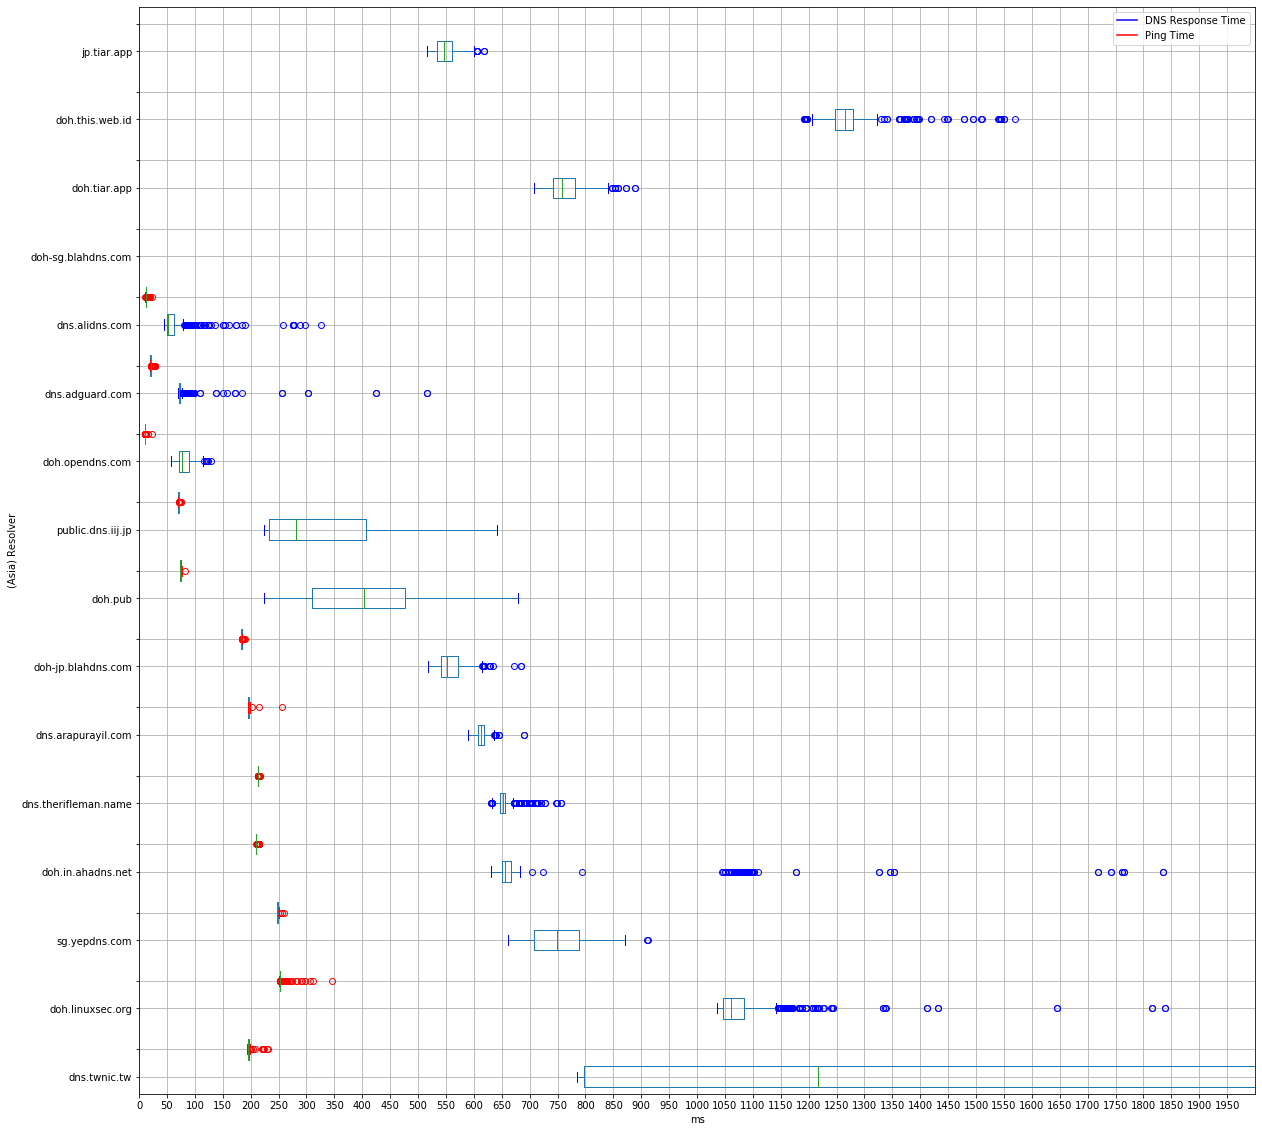

In [18]:
## This boxplot sorts by difference between response time and ping time in ascending order



# Asia Boxplot for Response Time, Domain: Google and Netflix
asia_array_of_resolvers = pd.Series(ip_asia['resolver']).unique()

asia_dict_resp_time_series={}
asia_length=len(asia_array_of_resolvers)

asia_both_resp=[0]*asia_length
asia_resp_time_series=[0]*asia_length

for i in range(asia_length):
    asia_both_resp[i]=df[(df['resolver']==asia_array_of_resolvers[i])]
    asia_resp_time_series[i]=(asia_both_resp[i]['rtime'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_resp_time_series[asia_new_list[i]]= asia_resp_time_series[i]
asia_frame_to_plot=pd.DataFrame(asia_dict_resp_time_series)


# Asia Boxplot for Ping Time

asia_dict_ping_series={}


asia_both_ping=[0]*asia_length
asia_ping_series = [0]*asia_length
for i in range(asia_length):
    asia_both_ping[i]=df[(df['resolver']==asia_array_of_resolvers[i])]
    asia_ping_series[i]=(asia_both_ping[i]['ping_time'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_ping_series[asia_new_list[i]]= asia_ping_series[i]
asia_ping_frame_to_plot=pd.DataFrame(asia_dict_ping_series)
asia_ping = asia_ping_frame_to_plot

# differences between response time and ping time

asia_dict_diff_series={}

asia_both_diff=[0]*asia_length
asia_diff_series = [0]*asia_length
for i in range(asia_length):
    asia_both_diff[i]=df[(df['resolver']==asia_array_of_resolvers[i])]
    asia_diff_series[i]=(asia_both_diff[i]['difference'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_diff_series[asia_new_list[i]]= asia_diff_series[i]
asia_diff_frame_to_plot=pd.DataFrame(asia_dict_diff_series)
asia_diff = asia_diff_frame_to_plot

#Make two plots and merge
c = "blue"
z = "red"



medians = asia_diff.median()
medians.sort_values(ascending=False, inplace=True)
ping_times = asia_ping[medians.index]
response_times = asia_frame_to_plot[medians.index]


asia_boxplot = response_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(asia_dict_resp_time_series)))*2.0-0.4, widths=0.6)
asia_ping_boxplot = ping_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(asia_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 2000
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Asia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.show()

In [13]:
asia_frame_to_plot.describe()

,dns.adguard.com,doh.in.ahadns.net,dns.alidns.com,dns.arapurayil.com,doh.opendns.com,dns.therifleman.name,doh.pub,doh-jp.blahdns.com,doh-sg.blahdns.com,doh.tiar.app,public.dns.iij.jp,doh.this.web.id,jp.tiar.app,doh.linuxsec.org,dns.twnic.tw,sg.yepdns.com
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,0.0,598.000000,598.000000,598.000000,598.000000,1196.000000,596.000000,596.000000
mean,78.881783,727.830433,61.899182,613.203565,81.252003,654.366494,410.151799,556.755934,NaN,762.575110,323.450275,1270.123288,548.769514,1078.913004,16220.478165,753.478512
std,38.140275,201.268780,32.138615,10.849277,13.075643,17.501873,127.055201,23.454777,NaN,29.768618,103.706222,54.635733,19.293093,83.183276,15763.596242,51.506817
min,68.945263,631.563404,45.519319,590.077233,58.037574,631.392822,223.035745,517.628485,NaN,707.366565,223.669129,1191.692062,516.434755,1034.853730,785.041678,661.976357
25%,71.043507,649.609374,49.770038,606.842416,71.301743,646.802583,309.047631,541.484848,NaN,742.362428,233.720087,1247.441875,533.131761,1046.055953,797.140013,708.153468
50%,72.219190,655.795160,51.453636,612.886477,77.728560,651.584619,402.695337,552.656919,NaN,758.565114,282.085961,1265.557012,546.636230,1061.004744,1216.120140,748.909856
75%,73.292225,665.888125,61.989227,618.470978,88.615866,656.477149,476.948293,570.742693,NaN,781.935205,406.869325,1278.676936,560.569174,1084.868521,32363.374184,788.393621
max,516.435914,1834.712004,325.566775,690.457754,129.119761,756.953541,679.649671,684.962871,NaN,889.618888,641.895153,1569.952921,618.546420,2325.038222,33950.197165,911.300109


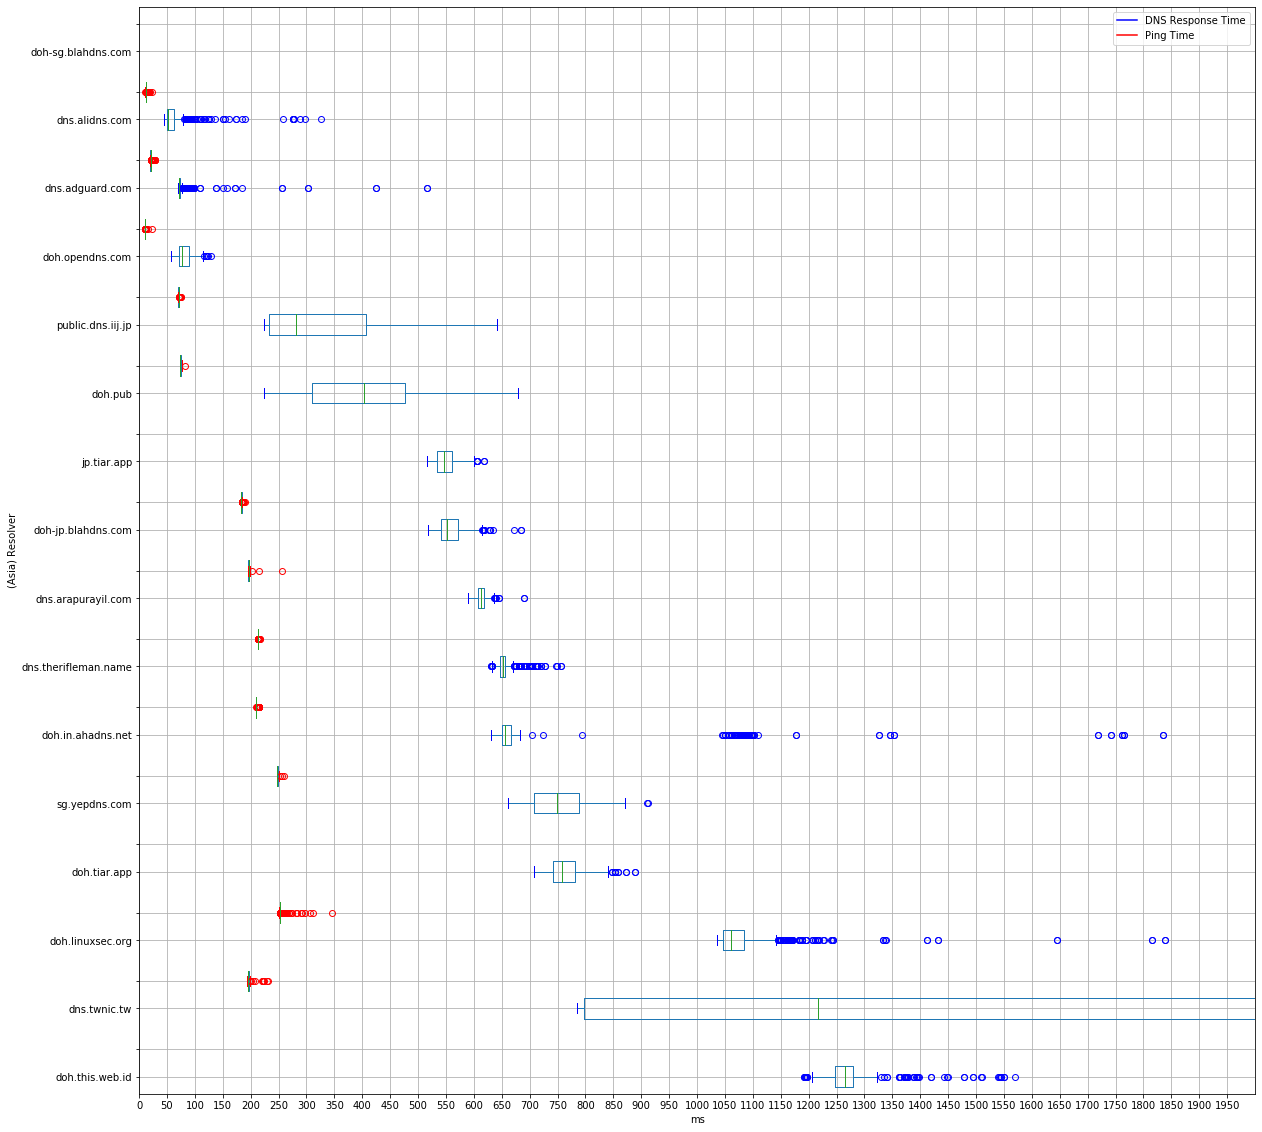

In [20]:
## This boxplot sorts by standard deviation of response time in ascending order



# Asia Boxplot for Response Time, Domain: Google and Netflix
asia_array_of_resolvers = pd.Series(ip_asia['resolver']).unique()

asia_dict_resp_time_series={}
asia_length=len(asia_array_of_resolvers)

asia_both_resp=[0]*asia_length
asia_resp_time_series=[0]*asia_length

for i in range(asia_length):
    asia_both_resp[i]=df[(df['resolver']==asia_array_of_resolvers[i])]
    asia_resp_time_series[i]=(asia_both_resp[i]['rtime'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_resp_time_series[asia_new_list[i]]= asia_resp_time_series[i]
asia_frame_to_plot=pd.DataFrame(asia_dict_resp_time_series)


# Asia Boxplot for Ping Time

asia_dict_ping_series={}


asia_both_ping=[0]*asia_length
asia_ping_series = [0]*asia_length
for i in range(asia_length):
    asia_both_ping[i]=df[(df['resolver']==asia_array_of_resolvers[i])]
    asia_ping_series[i]=(asia_both_ping[i]['ping_time'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_ping_series[asia_new_list[i]]= asia_ping_series[i]
asia_ping_frame_to_plot=pd.DataFrame(asia_dict_ping_series)
asia_ping = asia_ping_frame_to_plot


#Make two plots and merge
c = "blue"
z = "red"


deviation = asia_frame_to_plot.std()
deviation.sort_values(ascending=False, inplace=True)
ping_times = asia_ping[medians.index]
response_times = asia_frame_to_plot[medians.index]


asia_boxplot = response_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(asia_dict_resp_time_series)))*2.0-0.4, widths=0.6)
asia_ping_boxplot = ping_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(asia_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 2000
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Asia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.show()

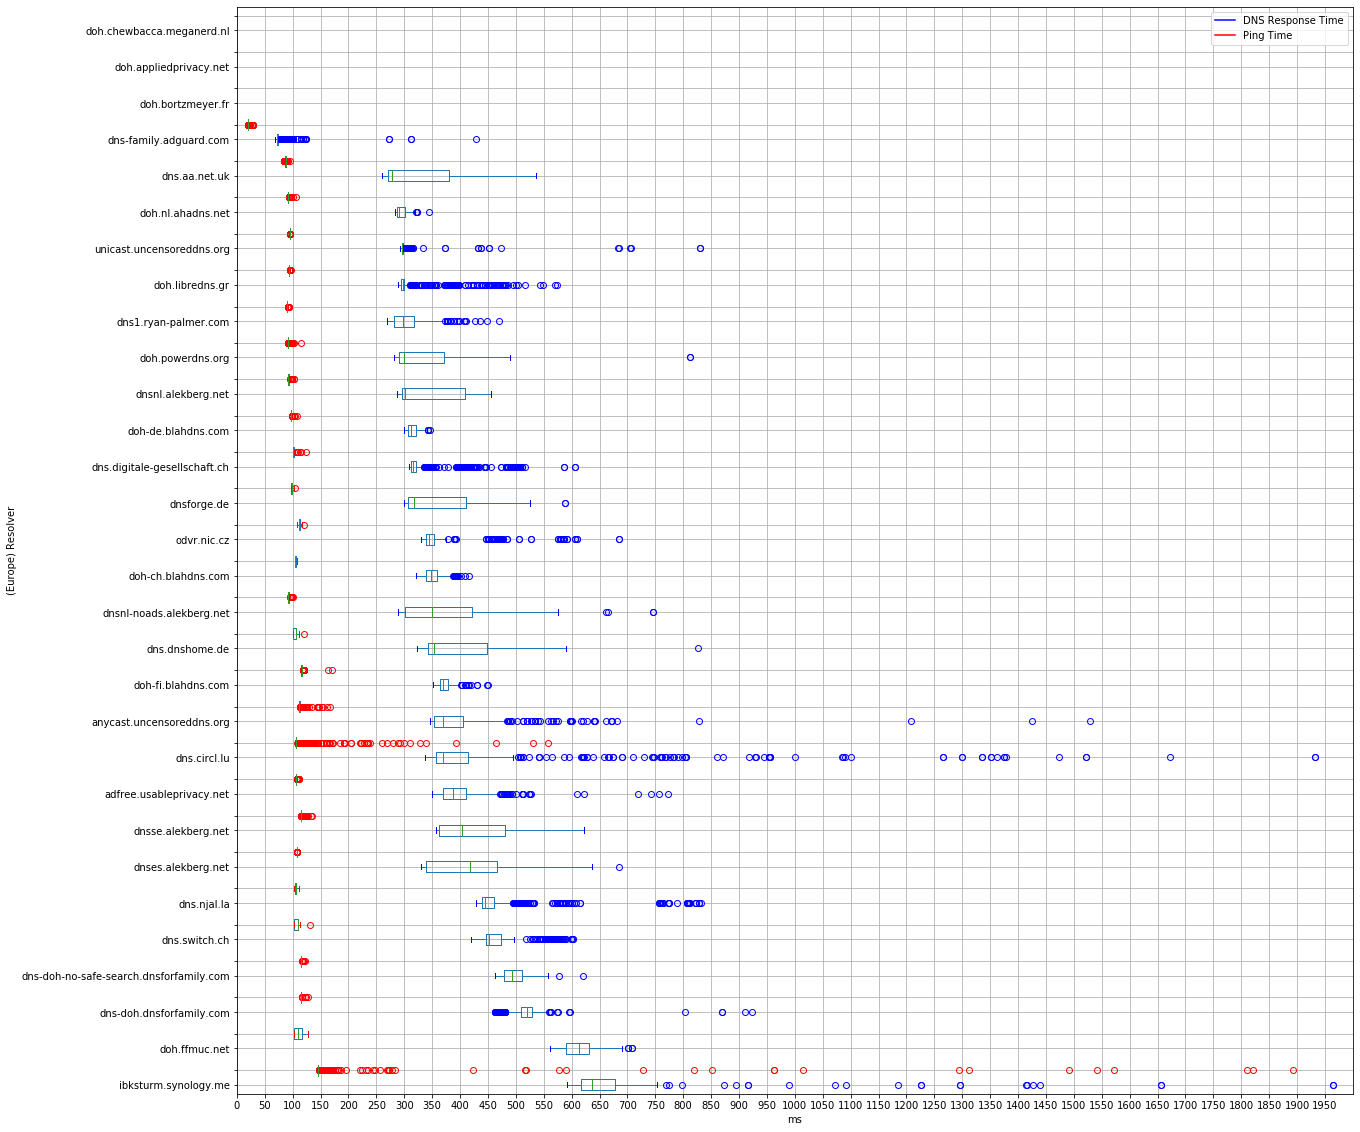

In [22]:
## This boxplot sorts by ascending order of DNS response time



# Europe Boxplot for Response Time, Domain: Google and Netflix
eur_array_of_resolvers = pd.Series(ip_europe['resolver']).unique()

eur_dict_resp_time_series={}
eur_length=len(eur_array_of_resolvers)

eur_both_resp=[0]*eur_length
eur_resp_time_series=[0]*eur_length

for i in range(eur_length):
    eur_both_resp[i]=df[(df['resolver']==eur_array_of_resolvers[i])]
    eur_resp_time_series[i]=(eur_both_resp[i]['rtime'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_resp_time_series[eur_new_list[i]]= eur_resp_time_series[i]
eur_frame_to_plot=pd.DataFrame(eur_dict_resp_time_series)


# Europe Boxplot for Ping Time

eur_dict_ping_series={}


eur_both_ping=[0]*eur_length
eur_ping_series = [0]*eur_length
for i in range(eur_length):
    eur_both_ping[i]=df[(df['resolver']==eur_array_of_resolvers[i])]
    eur_ping_series[i]=(eur_both_ping[i]['ping_time'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_ping_series[eur_new_list[i]]= eur_ping_series[i]
eur_ping_frame_to_plot=pd.DataFrame(eur_dict_ping_series)
eur_ping = eur_ping_frame_to_plot


#Make two plots and merge
c = "blue"
z = "red"


medians = eur_frame_to_plot.median()
medians.sort_values(ascending=False, inplace=True)
ping_times = eur_ping[medians.index]
response_times = eur_frame_to_plot[medians.index]


eur_boxplot = response_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(eur_dict_resp_time_series)))*2.0-0.4, widths=0.6)
eur_ping_boxplot = ping_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(eur_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 2000
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Europe) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.show()

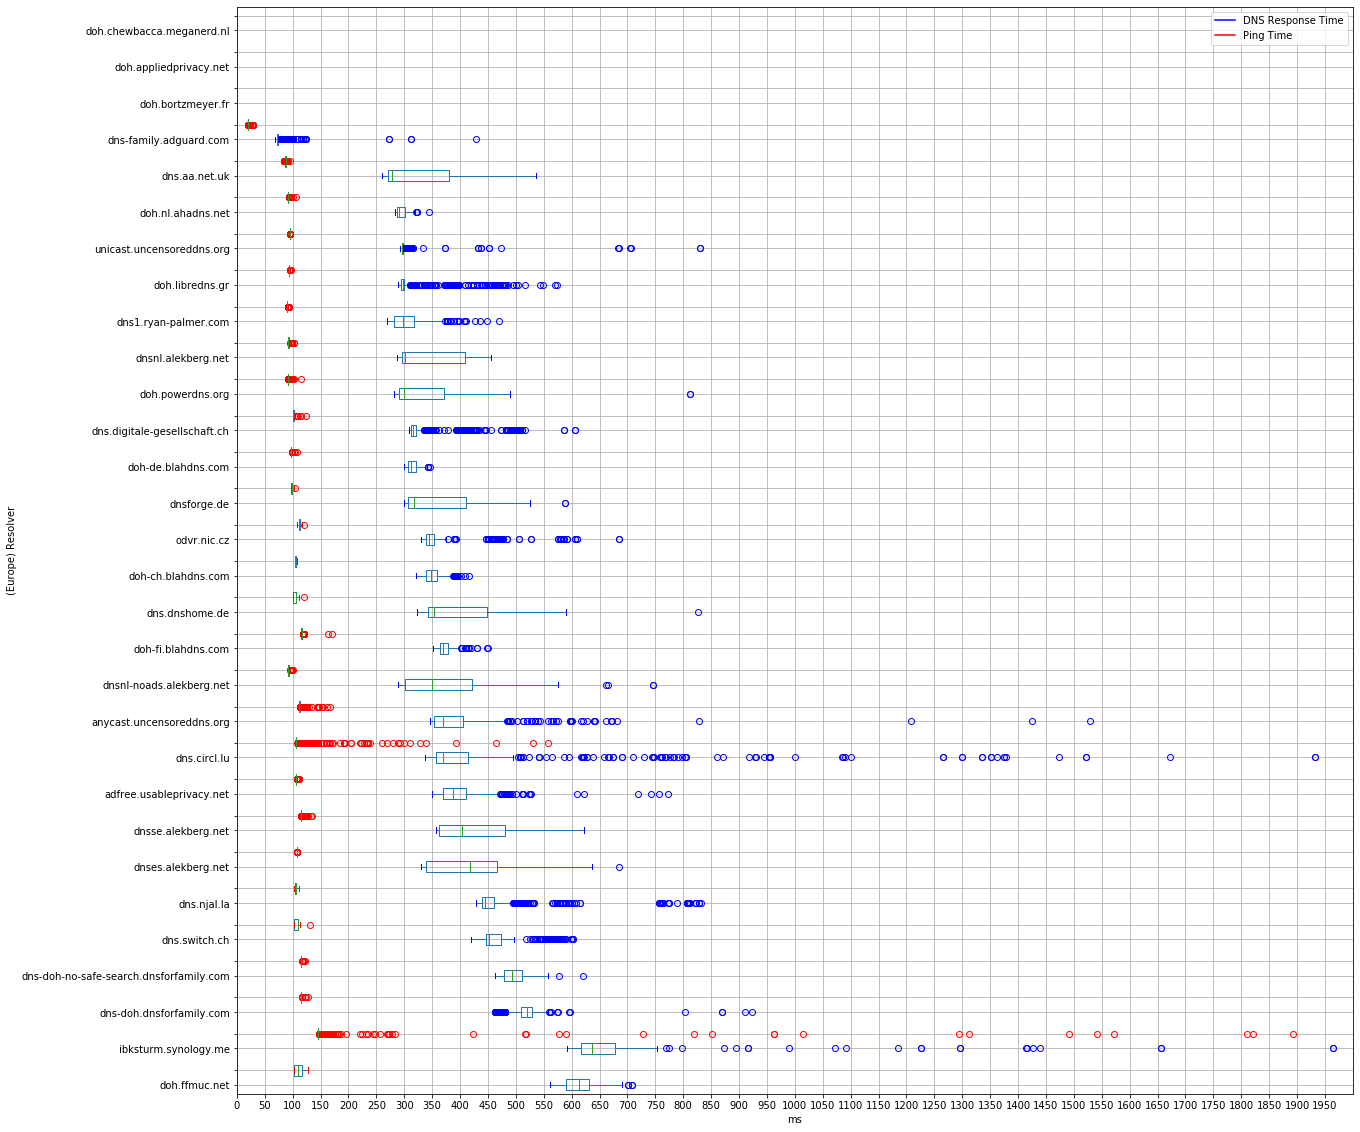

In [23]:
## This boxplot sorts by difference between response time and ping time in ascending order



# Europe Boxplot for Response Time, Domain: Google and Netflix
eur_array_of_resolvers = pd.Series(ip_europe['resolver']).unique()

eur_dict_resp_time_series={}
eur_length=len(eur_array_of_resolvers)

eur_both_resp=[0]*eur_length
eur_resp_time_series=[0]*eur_length

for i in range(eur_length):
    eur_both_resp[i]=df[(df['resolver']==eur_array_of_resolvers[i])]
    eur_resp_time_series[i]=(eur_both_resp[i]['rtime'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_resp_time_series[eur_new_list[i]]= eur_resp_time_series[i]
eur_frame_to_plot=pd.DataFrame(eur_dict_resp_time_series)


# Europe Boxplot for Ping Time

eur_dict_ping_series={}


eur_both_ping=[0]*eur_length
eur_ping_series = [0]*eur_length
for i in range(eur_length):
    eur_both_ping[i]=df[(df['resolver']==eur_array_of_resolvers[i])]
    eur_ping_series[i]=(eur_both_ping[i]['ping_time'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_ping_series[eur_new_list[i]]= eur_ping_series[i]
eur_ping_frame_to_plot=pd.DataFrame(eur_dict_ping_series)
eur_ping = eur_ping_frame_to_plot

# differences between response time and ping time

eur_dict_diff_series={}

eur_both_diff=[0]*eur_length
eur_diff_series = [0]*eur_length
for i in range(eur_length):
    eur_both_diff[i]=df[(df['resolver']==eur_array_of_resolvers[i])]
    eur_diff_series[i]=(eur_both_diff[i]['difference'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_diff_series[eur_new_list[i]]= eur_diff_series[i]
eur_diff_frame_to_plot=pd.DataFrame(eur_dict_diff_series)
eur_diff = eur_diff_frame_to_plot


#Make two plots and merge
c = "blue"
z = "red"


medians = eur_diff.median()
medians.sort_values(ascending=False, inplace=True)
ping_times = eur_ping[medians.index]
response_times = eur_frame_to_plot[medians.index]


eur_boxplot = response_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(eur_dict_resp_time_series)))*2.0-0.4, widths=0.6)
eur_ping_boxplot = ping_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(eur_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 2000
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Europe) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.show()

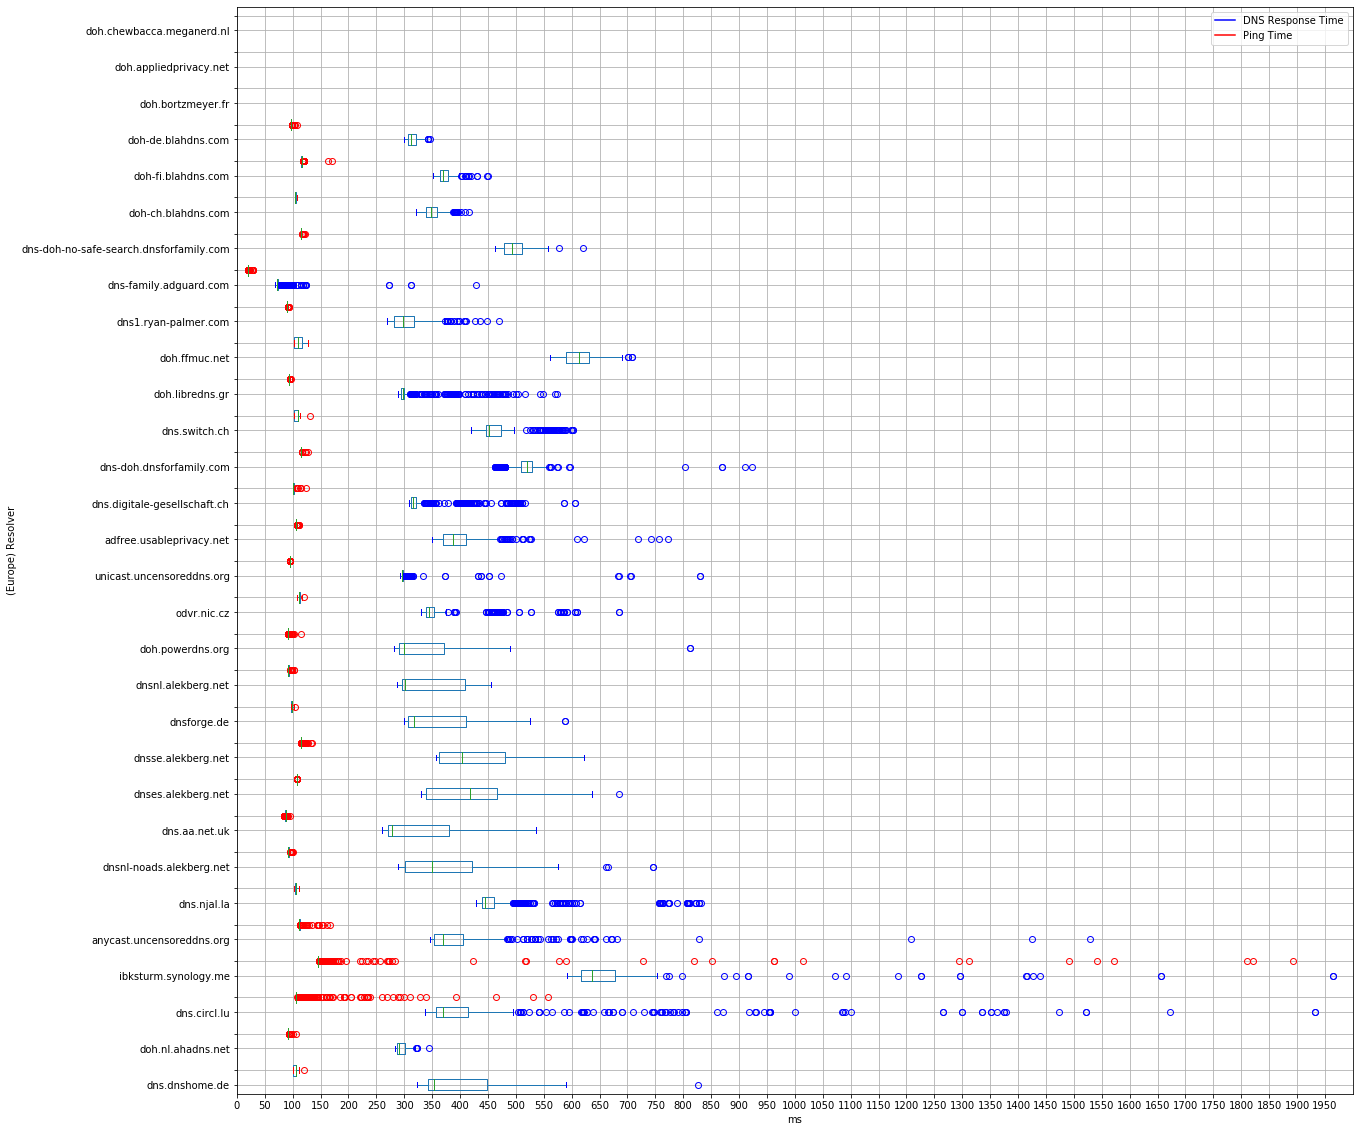

In [24]:
## This boxplot sorts by standard deviation of response time in ascending order



# Europe Boxplot for Response Time, Domain: Google and Netflix
eur_array_of_resolvers = pd.Series(ip_europe['resolver']).unique()

eur_dict_resp_time_series={}
eur_length=len(eur_array_of_resolvers)

eur_both_resp=[0]*eur_length
eur_resp_time_series=[0]*eur_length

for i in range(eur_length):
    eur_both_resp[i]=df[(df['resolver']==eur_array_of_resolvers[i])]
    eur_resp_time_series[i]=(eur_both_resp[i]['rtime'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_resp_time_series[eur_new_list[i]]= eur_resp_time_series[i]
eur_frame_to_plot=pd.DataFrame(eur_dict_resp_time_series)


# Europe Boxplot for Ping Time

eur_dict_ping_series={}


eur_both_ping=[0]*eur_length
eur_ping_series = [0]*eur_length
for i in range(eur_length):
    eur_both_ping[i]=df[(df['resolver']==eur_array_of_resolvers[i])]
    eur_ping_series[i]=(eur_both_ping[i]['ping_time'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_ping_series[eur_new_list[i]]= eur_ping_series[i]
eur_ping_frame_to_plot=pd.DataFrame(eur_dict_ping_series)
eur_ping = eur_ping_frame_to_plot


#Make two plots and merge
c = "blue"
z = "red"


deviation = eur_frame_to_plot.std()
deviation.sort_values(ascending=False, inplace=True)
ping_times = eur_ping[deviation.index]
response_times = eur_frame_to_plot[deviation.index]


eur_boxplot = response_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(eur_dict_resp_time_series)))*2.0-0.4, widths=0.6)
eur_ping_boxplot = ping_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(eur_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 2000
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Europe) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.show()